# JeepNi Machine Learning Model

(Description) This model uses linear regression to create predictive values for the expected income of JeepNi drivers given historical data.

---

## Import libraries

In [1]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### For Computation

In [4]:
import pandas as pd 
import numpy as np 
from scipy import stats

# Makes numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

### For Data Visualization

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### For Machine Learning

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

## Create artificial dataset

In [11]:
features, label = make_regression(n_samples=10000, n_features=2, n_targets=1, noise = 0.60, random_state=9)

In [12]:
features = pd.DataFrame(features, columns=['distance_traveled', 'trip_duration'])
label = pd.DataFrame(label, columns=['total_income'])
df = pd.concat([features, label], axis=1)

In [13]:
df.head()

,distance_traveled,trip_duration,total_income
0,1.149423,0.188645,57.739847
1,-1.042257,0.064738,-49.137429
2,1.249654,1.101442,69.197083
3,-0.031630,-0.276009,-2.326596
4,0.230280,1.183740,19.307031


## Exploratory data analysis

In [16]:
df.shape

(10000, 3)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance_traveled  10000 non-null  float64
 1   trip_duration      10000 non-null  float64
 2   total_income       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_traveled,10000.0,0.009400,1.001208,-3.744246,-0.651028,0.016084,0.678454,3.927385
trip_duration,10000.0,-0.008959,0.998469,-3.630473,-0.679866,-0.030190,0.681334,3.910465
total_income,10000.0,0.382191,49.078301,-183.036618,-32.492820,0.572716,33.022283,190.800168


### Regression plots

<Axes: xlabel='distance_traveled', ylabel='total_income'>

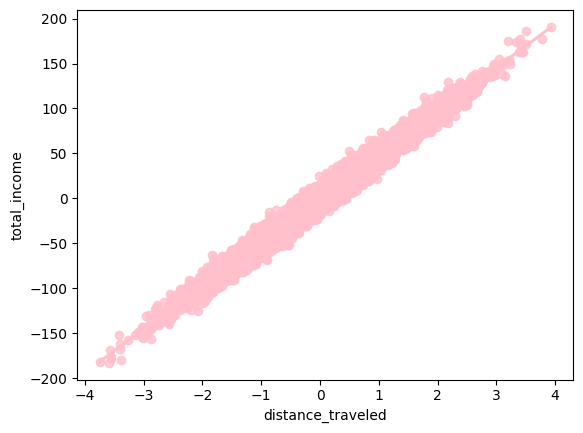

In [20]:
# For distance traveled and total_income
sns.regplot(x="distance_traveled", y="total_income", data=df, color="pink")

<Axes: xlabel='trip_duration', ylabel='total_income'>

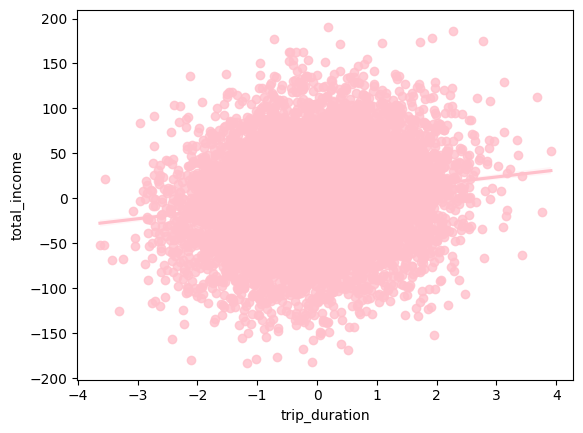

In [21]:
# For trip duration and total income
sns.regplot(x="trip_duration", y="total_income", data=df, color="pink")

### Residual plots

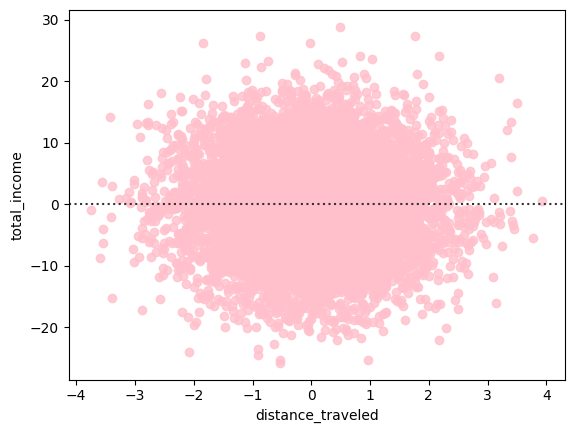

In [23]:
# For distance traveled and total income
sns.residplot(x=df["distance_traveled"], y=df["total_income"], color='pink')
plt.show()

<Axes: xlabel='trip_duration', ylabel='total_income'>

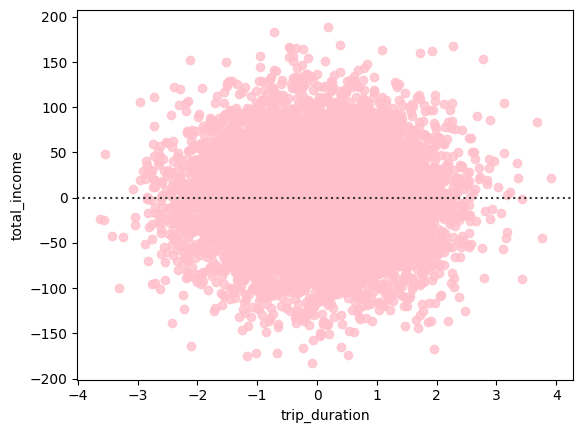

In [25]:
# For trip duration and total income
sns.residplot(x="trip_duration", y="total_income", data=df, color="pink")

## Multiple Linear Regression Model with Scikit Learn

### Model building

In [28]:
# Instantiate model
sk_model = LinearRegression()
sk_model

LinearRegression()

In [29]:
# Define predictor and target values
x = df[['distance_traveled', 'trip_duration']]
y = df['total_income']

In [30]:
sk_model.fit(x, y)

LinearRegression()

In [31]:
sk_model.intercept_

-0.007909763609981746

In [32]:
sk_model.coef_

array([48.405,  7.247])

## Linear Function
$$
y = b_0 + b_1x_1 + b_2x_2
$$

where: <br> 
$y$   : `total_income` <br>
$b_0$: `slope intercept` = -0.007909763609981746 <br>
$b_1$: `coefficient for trip duration` = 48.405 <br>
$b_2$: `coefficient for distance traveled` = 7.247 <br>

### Model evaluation

#### Via visualization

In [36]:
y_hat = sk_model.predict(x)

C:\Users\daeni\AppData\Local\Temp\ipykernel_19644\791459039.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['total_income'], hist=False, color="pink", label="Actual Value")
C:\Users\daeni\AppData\Local\Temp\ipykernel_19644\791459039.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

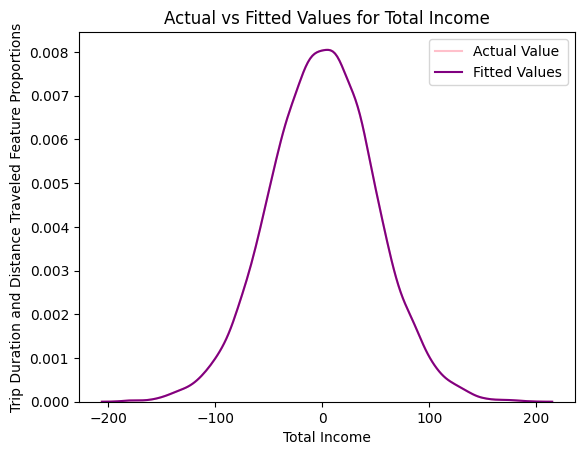

In [37]:
ax1 = sns.distplot(df['total_income'], hist=False, color="pink", label="Actual Value")
sns.distplot(y_hat, hist=False, color="purple", label="Fitted Values" , ax=ax1)

ax1.legend()

plt.title('Actual vs Fitted Values for Total Income')
plt.xlabel('Total Income')
plt.ylabel('Trip Duration and Distance Traveled Feature Proportions')

# plt.axis([0, 1000, 0, 0.015])
plt.show()

#### Via statistical measures

In [39]:
df.corr()

,distance_traveled,trip_duration,total_income
distance_traveled,1.000000,0.010368,0.988999
trip_duration,0.010368,1.000000,0.157664
total_income,0.988999,0.157664,1.000000


In [40]:
# Calculated R-squared
sk_model.score(x, y)

0.9998512192713128

In [41]:
# Adjusted R-squared
1 - (1-sk_model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9998511895062375

In [42]:
mse = mean_squared_error(df['total_income'], y_hat)
mse

0.3583292746709403

## Multiple Linear Regression Model with Tensorflow

### Split dataset

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Normalize data

In [47]:
train_dataset = pd.concat([x_train, y_train], axis=1)
train_dataset.head()

,distance_traveled,trip_duration,total_income
7389,-1.645509,0.729352,-74.423574
9275,3.099522,-1.517021,138.429861
2995,1.738144,0.446605,85.811069
5316,-1.272771,-1.480858,-72.469995
356,-1.246785,-0.348537,-63.189801


In [48]:
print(train_dataset.describe().transpose()[['mean', 'std']])

                       mean        std
distance_traveled  0.009131   0.999893
trip_duration     -0.003711   0.998041
total_income       0.408364  49.026510


In [50]:
# Normalization
layer = layers.Normalization()

# Adapt to data 
layer.adapt(np.array(x_train)) 

In [54]:
# Sequential model 
seq_model = keras.models.Sequential([
    layer,
    layers.Dense(units=1)
])

In [56]:
seq_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ ?                      │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5 (24.00 B)

In [111]:
# Define loss and optimizer 
loss = keras.losses.MeanAbsoluteError() # mse
optim = keras.optimizers.Adam(learning_rate=0.01) 

seq_model.compile(optimizer=optim, loss=loss)

In [119]:
history = seq_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4908 - val_loss: 0.4717
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4843 - val_loss: 0.4723
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4896 - val_loss: 0.4738
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4849 - val_loss: 0.4725
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4877 - val_loss: 0.4718
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4794 - val_loss: 0.4730
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4763 - val_loss: 0.4730
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4779 - val_loss: 0.4718
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4756 - val_loss: 0.4743
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4878 - val_loss: 0.4742
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.4837 - val_loss: 0.4716
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━

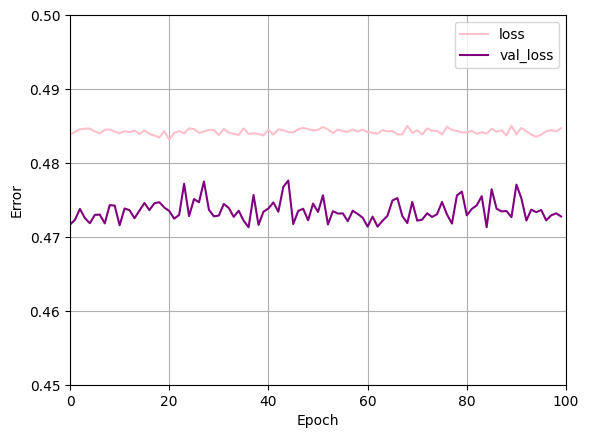

In [125]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss', color='pink')
    plt.plot(history.history['val_loss'], label='val_loss', color='purple')
    # plt.ylim([23, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.axis([0, 100, 0.450, 0.500])
plot_loss(history)

In [121]:
# Model evaluation 
seq_model.evaluate(
    x_test, 
    y_test, verbose=1
)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4707


0.47479912638664246

## Convert model to TFLite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(seq_model)
jeepni_model = converter.convert()

# Save the model.
with open('jeepni_model.tflite', 'wb') as f:
  f.write(jeepni_model)